In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_df = pd.read_feather('train_df')

Effect of number of previous sessions in the last two months on probability of purchase over 7 days and 14 days. Only included groups with more than 10 users at that number of sessions. Increased number of sessions broadly lead to increased probability of purchase over both time periods in the future.

In [3]:
prev_sessions_count_7day = np.concatenate([np.array(train_df.groupby('num_previous_sessions').purchase_7day.mean().index).reshape(-1,1), 
                           np.array(train_df.groupby('num_previous_sessions').purchase_7day.mean()).reshape(-1,1)], axis=1)

prev_sessions_count_14day = np.concatenate([np.array(train_df.groupby('num_previous_sessions').purchase_14day.mean().index).reshape(-1,1), 
                           np.array(train_df.groupby('num_previous_sessions').purchase_14day.mean()).reshape(-1,1)], axis=1)

prev_sessions_count_7day = prev_sessions_count_7day[train_df.num_previous_sessions.value_counts() > 10]
prev_sessions_count_14day = prev_sessions_count_14day[train_df.num_previous_sessions.value_counts() > 10]

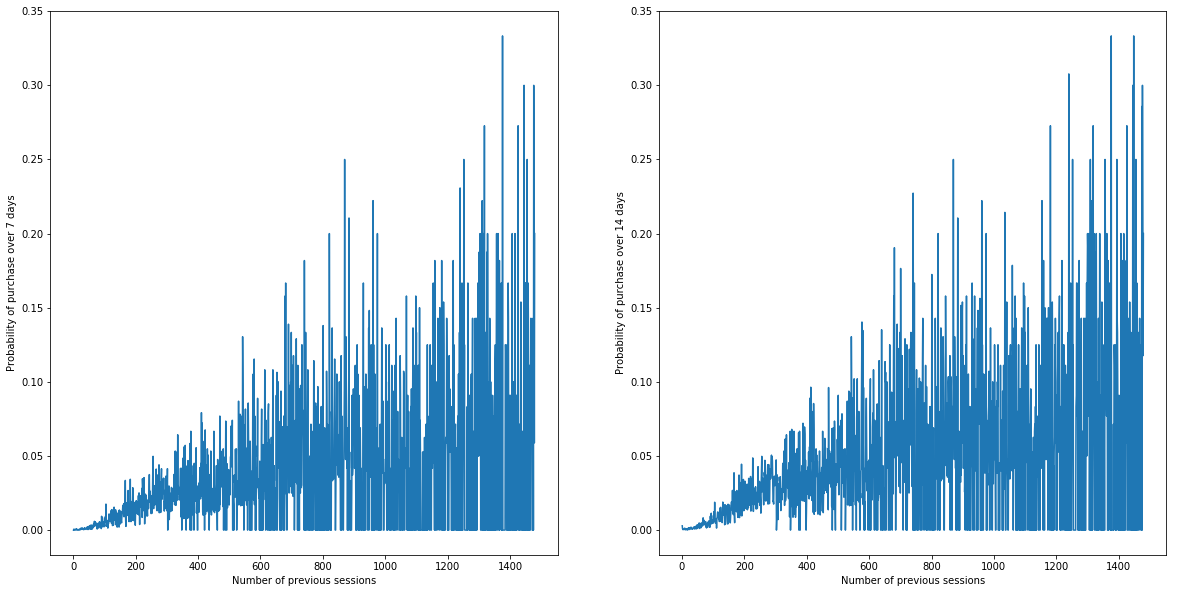

In [4]:
fig, ax = plt.subplots(figsize=(20, 10), ncols=2, nrows=1)
ax[0].plot(prev_sessions_count_7day[:, 0], prev_sessions_count_7day[:, 1])
ax[0].set_xlabel('Number of previous sessions')
ax[0].set_ylabel('Probability of purchase over 7 days')
ax[1].plot(prev_sessions_count_14day[:, 0], prev_sessions_count_14day[:, 1])
ax[1].set_xlabel('Number of previous sessions')
ax[1].set_ylabel('Probability of purchase over 14 days')
plt.show()

Effect of number of purchases in the last two months on probability of purchase over the next 7 days and next 14 days, clearly more purchases in the past make it more likely to purchase in the future.

In [5]:
prev_purchases_count_7day = np.concatenate([np.array(train_df.groupby('purchase').purchase_7day.mean().index).reshape(-1,1), 
                           np.array(train_df.groupby('purchase').purchase_7day.mean()).reshape(-1,1)], axis=1)

prev_purchases_count_14day = np.concatenate([np.array(train_df.groupby('purchase').purchase_14day.mean().index).reshape(-1,1), 
                           np.array(train_df.groupby('purchase').purchase_14day.mean()).reshape(-1,1)], axis=1)

prev_purchases_count_7day = prev_purchases_count_7day[train_df.purchase.value_counts() > 5]
prev_purchases_count_14day = prev_purchases_count_14day[train_df.purchase.value_counts() > 5]

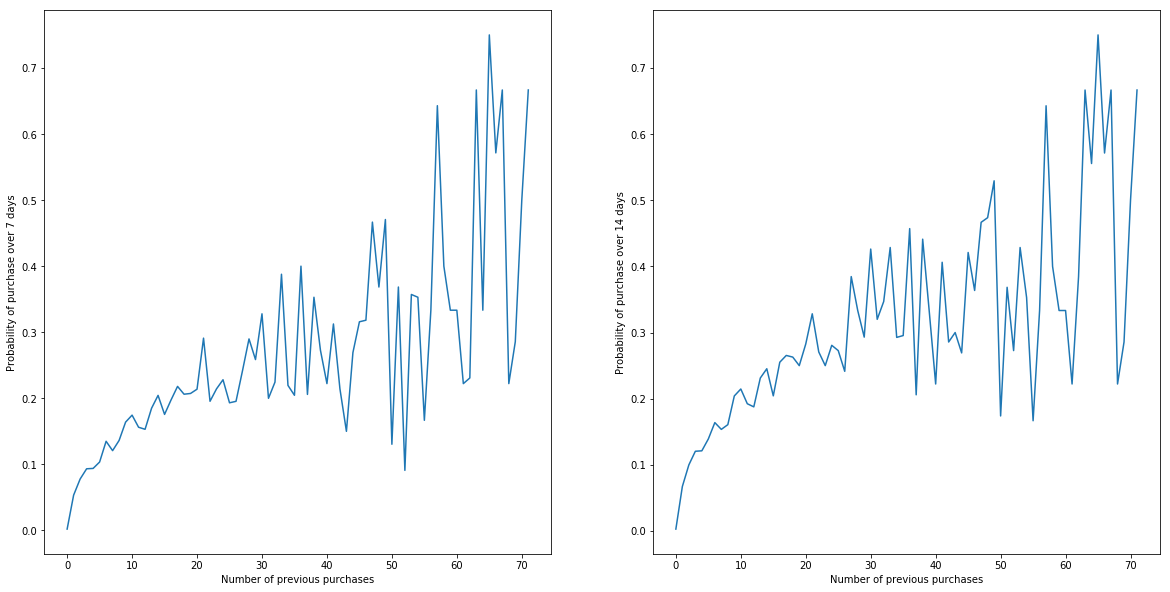

In [6]:
fig, ax = plt.subplots(figsize=(20, 10), ncols=2, nrows=1)
ax[0].plot(prev_purchases_count_7day[:, 0], prev_purchases_count_7day[:, 1])
ax[0].set_xlabel('Number of previous purchases')
ax[0].set_ylabel('Probability of purchase over 7 days')
ax[1].plot(prev_purchases_count_14day[:, 0], prev_purchases_count_14day[:, 1])
ax[1].set_xlabel('Number of previous purchases')
ax[1].set_ylabel('Probability of purchase over 14 days')
plt.show()

Effect of average duration of previous sessions on probability of purchase over 7 days and 14 days. Did some binning so that took the average of a bin of groups instead of the average of each group as groupby resulted in a single point in most groups (there's probably an easier way to do this). Clearly outliers with very long sessions, could potentially make this a separate feature.

In [7]:
prev_sessions_duration_7day = np.concatenate([np.array(train_df.groupby('previous_sessions_avg_duration').purchase_7day.mean().index).reshape(-1,1), 
                              np.array(train_df.groupby('previous_sessions_avg_duration').purchase_7day.mean()).reshape(-1,1)], axis=1)

prev_sessions_duration_14day = np.concatenate([np.array(train_df.groupby('previous_sessions_avg_duration').purchase_14day.mean().index).reshape(-1,1), 
                           np.array(train_df.groupby('previous_sessions_avg_duration').purchase_14day.mean()).reshape(-1,1)], axis=1)
nbins = 50
bins_7day = np.linspace(0, prev_sessions_duration_7day[:,0].max(), nbins)
bins_14day = np.linspace(0, prev_sessions_duration_14day[:,0].max(), nbins)
prev_sessions_duration_7day = pd.DataFrame(np.concatenate([np.digitize(prev_sessions_duration_7day[:,0], bins_7day).reshape(-1,1), prev_sessions_duration_7day], axis=1))
prev_sessions_duration_7day.columns = ["bin", "prev_sessions_avg_duration", "probability_7day"]
prev_sessions_duration_14day = pd.DataFrame(np.concatenate([np.digitize(prev_sessions_duration_14day[:,0], bins_14day).reshape(-1,1), prev_sessions_duration_14day], axis=1))
prev_sessions_duration_14day.columns = ["bin", "prev_sessions_avg_duration", "probability_14day"]

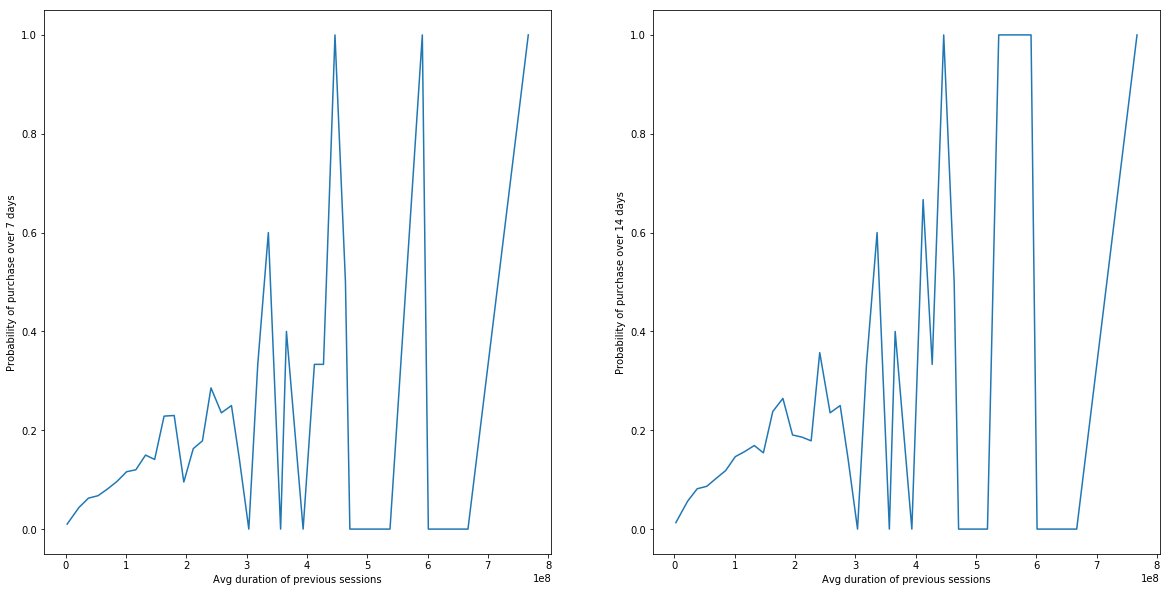

In [8]:
fig, ax = plt.subplots(figsize=(20, 10), ncols=2, nrows=1)
ax[0].plot(prev_sessions_duration_7day.groupby("bin").prev_sessions_avg_duration.mean(), prev_sessions_duration_7day.groupby("bin").probability_7day.mean())
ax[0].set_xlabel('Avg duration of previous sessions')
ax[0].set_ylabel('Probability of purchase over 7 days')
ax[1].plot(prev_sessions_duration_14day.groupby("bin").prev_sessions_avg_duration.mean(), prev_sessions_duration_14day.groupby("bin").probability_14day.mean())
ax[1].set_xlabel('Avg duration of previous sessions')
ax[1].set_ylabel('Probability of purchase over 14 days')
plt.show()